In [4]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [5]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0  

In [6]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [7]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [8]:
#choosing an action based on e-greedy policy
def select_action(state,act_choices):
    global td_Q
    global td_Ct, used_q, not_used_q, used_eps
    epsilon = 0.1 
    n = random.uniform(0,1) 
    if(n<epsilon):
        used_eps+=1
        return random.choice(act_choices)
    else:
        act_chosen=-1
        q_val=-1000.0
        for act in act_choices:
            if (td_Q[state][act]!=0 and td_Q[state][act]>q_val):
                q_val=td_Q[state][act]
                act_chosen=act
        if (act_chosen<0):
            act_chosen = random.choice(act_choices)
            not_used_q+=1 
        else:
            used_q+=1

    return act_chosen

In [63]:
#trains an agent using 1 million episodes
def off_policy_td_control():
    global win_list,loss_list,tie_list,x_axis
    wins = 0 
    loss = 0 
    tie = 0 
    global td_Q
    reward_list = []
    for i in range(1000001):  
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        reward_list.append(reward)
        while(reward==0 and len(action_choices)>0):
            state_key=state_to_key(state)
            action = select_action(state_key,action_choices)
            action_choices.remove(action)   
            player=player%2+1
            new_state,reward=make_move(state,action,player)
            new_state_key=state_to_key(new_state)
            alpha=0.1
            td_Q[state_key][action] += alpha * (reward + np.max(td_Q[new_state_key]) - td_Q[state_key][action])
            state=new_state
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
        if (i>0 and (i%100000==0 or i==50000 or i==20000 or i==10000 or i==5000)):
            print("After ",i," episodes: ")
            total=wins+loss+tie
            win_pct=round(100*wins/total,2)
            loss_pct=round(100*loss/total,2)
            tie_pct=round(100*tie/total,2)
            if total>0:
                x_axis.append(i)
                win_list.append(win_pct)
                loss_list.append(loss_pct)
                tie_list.append(tie_pct)
            print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)
            wins = 0 
            loss = 0 
            tie = 0 
    
    return td_Q

In [64]:
td_Q = np.zeros([3**16,16])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
off_policy_td_control()

After  5000  episodes: 
   wins:  29.87 ; loss:  28.27 ; tie:  41.85
After  10000  episodes: 
   wins:  30.02 ; loss:  29.46 ; tie:  40.52
After  20000  episodes: 
   wins:  28.9 ; loss:  29.36 ; tie:  41.74
After  50000  episodes: 
   wins:  44.54 ; loss:  23.47 ; tie:  32.0
After  100000  episodes: 
   wins:  76.64 ; loss:  10.47 ; tie:  12.89
After  200000  episodes: 
   wins:  78.5 ; loss:  9.26 ; tie:  12.23
After  300000  episodes: 
   wins:  83.96 ; loss:  7.2 ; tie:  8.83
After  400000  episodes: 
   wins:  86.04 ; loss:  6.58 ; tie:  7.38
After  500000  episodes: 
   wins:  84.44 ; loss:  6.71 ; tie:  8.86
After  600000  episodes: 
   wins:  88.39 ; loss:  5.39 ; tie:  6.22
After  700000  episodes: 
   wins:  87.75 ; loss:  5.4 ; tie:  6.85
After  800000  episodes: 
   wins:  90.28 ; loss:  4.51 ; tie:  5.21
After  900000  episodes: 
   wins:  90.42 ; loss:  4.37 ; tie:  5.21
After  1000000  episodes: 
   wins:  91.66 ; loss:  3.7 ; tie:  4.64


array([[0.99930117, 0.98394354, 0.99999998, ..., 0.99645848, 0.98970824,
        0.99875528],
       [0.        , 0.21272198, 0.        , ..., 0.67062533, 0.0779114 ,
        0.33292566],
       [0.        , 0.        , 0.01596364, ..., 0.02458   , 0.28144579,
        0.2521074 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[29.87, 30.02, 28.9, 44.54, 76.64, 78.5, 83.96, 86.04, 84.44, 88.39, 87.75, 90.28, 90.42, 91.66]
[28.27, 29.46, 29.36, 23.47, 10.47, 9.26, 7.2, 6.58, 6.71, 5.39, 5.4, 4.51, 4.37, 3.7]
[41.85, 40.52, 41.74, 32.0, 12.89, 12.23, 8.83, 7.38, 8.86, 6.22, 6.85, 5.21, 5.21, 4.64]
[5000, 10000, 20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


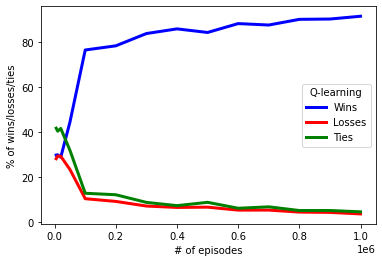

In [65]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Q-learning')
plt.xlabel("# of episodes")
plt.ylabel("% of wins/losses/ties")
plt.show()